In [ ]:
import numpy as np
import pandas as pd
import scipy
import scipy.io as sio
from collections import Counter

from scipy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.metrics import confusion_matrix
def spe(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

In [ ]:
%autosave 180

Autosaving every 180 seconds


In [ ]:
Drugs = pd.read_csv('0416Drug_5_group.txt', sep = '\t')
Drugs.head()

,atom_stereo_count,bond_stereo_count,canonical_smiles,charge,complexity,covalent_unit_count,defined_atom_stereo_count,defined_bond_stereo_count,h_bond_acceptor_count,h_bond_donor_count,...,157,158,159,160,161,162,163,164,165,group
0,9,0,CC(C)CC(C(=O)NC(CCCN=C(N)N)C(=O)N1CCCC1C(=O)NN...,0,2560.0,1,9,0,16,17,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0
1,10,0,CC(C)CC(C(=O)NC(CCCN=C(N)N)C(=O)N1CCCC1C(=O)NC...,0,2840.0,1,10,0,16,16,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0
2,12,1,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,0,2330.0,1,12,1,12,5,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,10,0,CC(C1C(=O)NC(CSSCC(C(=O)NC(C(=O)NC(C(=O)NC(C(=...,0,1740.0,1,10,0,14,13,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0
4,0,0,CC1=NC=C(C(=C1O)C=O)COP(=O)(O)O,0,292.0,1,0,0,7,3,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0


In [ ]:
print(Counter(Drugs['group']))

Counter({3: 2570, 0: 1923, 2: 945, 4: 536, 1: 210})


#### 0: MDon 
#### 1: MDoff
#### 2: CDoff
#### 3: TD
#### 4: CDon

In [ ]:
y=Drugs['group']
y.shape

(6184,)

In [ ]:
X=Drugs.drop(columns=['group','canonical_smiles'])

In [ ]:
X.shape

(6184, 184)

In [ ]:
X

,atom_stereo_count,bond_stereo_count,charge,complexity,covalent_unit_count,defined_atom_stereo_count,defined_bond_stereo_count,h_bond_acceptor_count,h_bond_donor_count,heavy_atom_count,...,156,157,158,159,160,161,162,163,164,165
0,9,0,0,2560.0,1,9,0,16,17,91,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,10,0,0,2840.0,1,10,0,16,16,102,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,12,1,0,2330.0,1,12,1,12,5,85,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,10,0,0,1740.0,1,10,0,14,13,71,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0,0,0,292.0,1,0,0,7,3,16,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6179,0,0,0,645.0,2,0,0,8,4,35,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6180,0,0,0,712.0,1,0,0,8,2,35,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6181,6,0,0,466.0,1,6,0,2,1,20,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
6182,1,0,0,249.0,1,1,0,2,0,19,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6179    4
6180    4
6181    4
6182    4
6183    4
Name: group, Length: 6184, dtype: int64

In [ ]:
#td/non_td

In [ ]:
def fill(a):
    a=np.where(np.isnan(a), ma.array(a, mask=np.isnan(a)).mean(axis=0), a)
    return a

In [ ]:
y_t_nt=[]
for i in y:
    if i ==3:
        y_t_nt.append(0)
    else:
        y_t_nt.append(1)

In [ ]:
random_seed = 42
np.random.seed(random_seed)
X = np.array(X)
y = np.array(y_t_nt)

skf = StratifiedKFold(n_splits=10, random_state = random_seed, shuffle=True)
skf.get_n_splits(X, y)
print(skf)  
FoldIndicesList = []
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    FoldIndicesList.append((train_index,test_index))
FoldIndicesList = np.asarray(FoldIndicesList)
np.save('FoldIndicesList_t_nt',FoldIndicesList)

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [   0    1    2 ... 6181 6182 6183] TEST: [  18   22   27   29   31   35   40   51   53   65   68   71   89   90
   91   93   97  102  115  121  123  132  141  143  148  150  156  164
  190  199  215  227  231  234  235  244  251  260  263  264  273  278
  289  310  312  331  339  348  350  358  361  370  371  373  380  392
  410  418  419  432  438  441  454  467  469  472  494  500  501  504
  507  511  515  518  533  534  548  566  572  578  579  588  614  640
  656  659  671  676  686  692  699  719  730  736  752  768  775  786
  787  815  816  847  877  882  884  901  907  908  919  929  931  942
  945  947  952  953  980  981  989  991 1003 1004 1009 1050 1055 1068
 1074 1091 1110 1117 1127 1153 1174 1178 1229 1235 1237 1255 1259 1264
 1273 1297 1317 1326 1344 1396 1425 1436 1455 1457 1475 1482 1493 1503
 1527 1545 1554 1560 1568 1575 1582 1584 1602 1614 1617 1627 1630 1643
 1650 1654 1657 1664 1671 1691 1704 172

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
pg = ParameterGrid({
    'min_samples_leaf': [1,50,100],
    'max_features': [0.4, 0.5, 0.6],
    'n_estimators': [100,500,1000],
    'n_jobs': [-1],
    'random_state': [42]
})

In [ ]:
y=pd.DataFrame(y)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import joblib

In [ ]:
import numpy.ma as ma

In [ ]:
from sklearn.ensemble import RandomForestClassifier

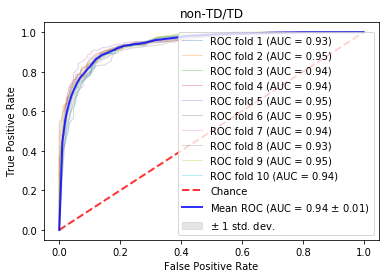

In [ ]:
from matplotlib.pyplot import figure
from sklearn.metrics import recall_score,f1_score,roc_auc_score,precision_score


n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves


N = len(y)

cv_scores = []
predictions = {
    'pred': np.zeros(N, dtype=np.bool),
    'proba': np.zeros(N),
    'foldno': np.zeros(N, dtype=np.int32) - 1,
}







sen_list=[]
spe_list=[]


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n=0
fig=plt.figure()
#plt.rcParams["figure.figsize"] = [15,15]
best_score_last=0
BIGGER_SIZE=10
plt.rcParams.update({'font.size': BIGGER_SIZE})
for i in range(10):
    n+=1
    X_train = X[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])].copy()
    X_vali = X[FoldIndicesList[i-1][1]].copy()
    X_test = X[FoldIndicesList[i][1]].copy()
    
    
    y_train = y.loc[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])]
    y_train = y_train.reset_index(drop=True)
    
    y_vali = y.loc[FoldIndicesList[i-1][1]]
    y_vali = y_vali.reset_index(drop=True)
    
    y_test = y.loc[FoldIndicesList[i][1]]
    y_test = y_test.reset_index(drop=True)
    X_train=fill(X_train)
    X_vali=fill(X_vali)
    X_test=fill(X_test)
    
    #best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier, paramGrid,X_train, y_train, X_vali,metric=recall_score,  scoreLabel='AUC')   

    
    
    


    model=RandomForestClassifier()
    best_params = None
    best_val_f1 = None
    for these_params in pg:
        model.set_params(**these_params)
        model.fit(X_train, y_train)
        this_val_f1 = spe(y_vali, model.predict(X_vali))
        if not best_params or this_val_f1 > best_val_f1:
            best_params = these_params
            best_val_f1 = this_val_f1
    if len(pg) > 1:
        model.set_params(**best_params)
        model.fit(X_train, y_train)

    
    
    
    
    
    
    
    
    
    
    
    probas_ = model.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.rcParams["figure.figsize"] = (15,15)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label ='ROC fold %d (AUC = %0.2f)' % (n, roc_auc))
    y_test_predict=model.predict(X_test)
    sen_list.append(recall_score(y_test,y_test_predict, average="weighted"))
    spe_list.append(spe(y_test,y_test_predict))
    
    
    
    joblib.dump(model, 'model_TD_NTD_'+str(i)+'.pkl')
    
    this_score=spe(y_vali,model.predict(X_vali))


    #fig.canvas.draw()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('non-TD/TD')
plt.legend(loc="lower right")
plt.savefig("roc_TD_NTD.png",dpi=400)
                    
np.save('sen_TD_NTD_list.npy', sen_list)                    
np.save('spe_TD_NTD_list.npy', spe_list)                      
                    

In [ ]:
#CD/MD

In [ ]:
y=Drugs['group']
X=Drugs.drop(columns=['group','canonical_smiles'])

In [ ]:
y_m_c=[]
X_m_c=[]

for i in range(len(y)):
    
    if y[i] ==3:
        continue
    elif y[i] ==0 or y[i] == 1:
        
        y_m_c.append(1)
        X_m_c.append(X.iloc[i,:].values)
    else:
        
        y_m_c.append(0)
        X_m_c.append(X.iloc[i,:].values)

In [ ]:
X_m_c=np.array(X_m_c)

In [ ]:
random_seed = 42
np.random.seed(random_seed)
X = np.array(X_m_c)
y = np.array(y_m_c)

skf = StratifiedKFold(n_splits=10, random_state = random_seed, shuffle=True)
skf.get_n_splits(X, y)
print(skf)  
FoldIndicesList = []
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    FoldIndicesList.append((train_index,test_index))
FoldIndicesList = np.asarray(FoldIndicesList)
np.save('FoldIndicesList_m_c',FoldIndicesList)

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [   0    1    2 ... 3610 3611 3612] TEST: [   8   18   19   28   60   66   67   69   73   87  114  116  136  140
  166  185  195  204  223  225  229  230  235  246  267  289  296  331
  347  350  351  352  360  379  403  405  408  415  416  425  443  448
  451  463  469  470  483  498  501  506  526  530  534  539  591  593
  630  631  634  637  657  668  682  686  690  703  732  751  767  789
  795  812  821  828  833  838  846  869  873  881  887  891  896  905
  922  925  927  930  940  944  969  983 1003 1004 1020 1023 1034 1040
 1044 1053 1059 1076 1084 1087 1108 1110 1117 1123 1134 1141 1144 1175
 1176 1177 1181 1199 1200 1204 1209 1213 1215 1219 1239 1241 1253 1254
 1255 1256 1257 1259 1262 1263 1266 1267 1273 1279 1283 1285 1301 1307
 1308 1315 1320 1334 1339 1345 1356 1374 1410 1416 1417 1438 1440 1442
 1443 1461 1467 1491 1512 1516 1523 1530 1538 1556 1562 1570 1585 1603
 1617 1627 1652 1659 1669 1677 1694 169

In [ ]:
y=pd.DataFrame(y)


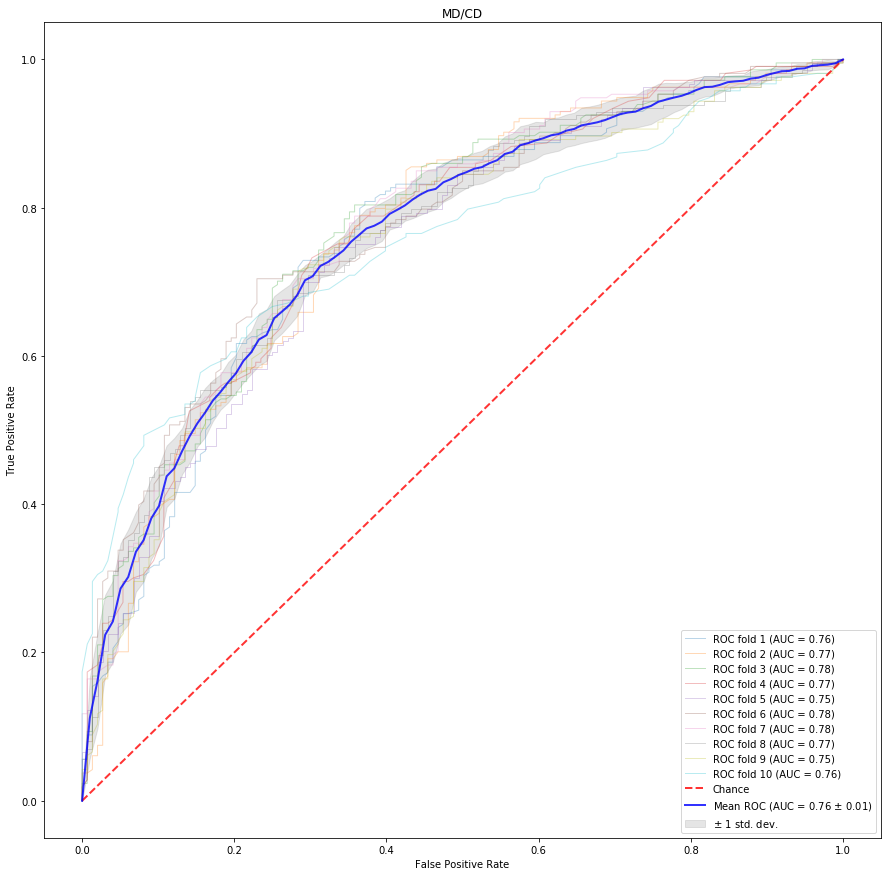

In [ ]:
from matplotlib.pyplot import figure
from sklearn.metrics import recall_score,f1_score,roc_auc_score,precision_score

n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves


N = len(y)

cv_scores = []
predictions = {
    'pred': np.zeros(N, dtype=np.bool),
    'proba': np.zeros(N),
    'foldno': np.zeros(N, dtype=np.int32) - 1,
}







sen_list=[]
spe_list=[]


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n=0
fig=plt.figure()
#plt.rcParams["figure.figsize"] = [15,15]
best_score_last=0
for i in range(10):
    n+=1
    X_train = X[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])].copy()
    X_vali = X[FoldIndicesList[i-1][1]].copy()
    X_test = X[FoldIndicesList[i][1]].copy()
    
    
    y_train = y.loc[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])]
    y_train = y_train.reset_index(drop=True)
    
    y_vali = y.loc[FoldIndicesList[i-1][1]]
    y_vali = y_vali.reset_index(drop=True)
    
    y_test = y.loc[FoldIndicesList[i][1]]
    y_test = y_test.reset_index(drop=True)
    X_train=fill(X_train)
    X_vali=fill(X_vali)
    X_test=fill(X_test)

    #best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier, paramGrid,X_train, y_train, X_vali,metric=recall_score,  scoreLabel='AUC')   

    
    
    


    model=RandomForestClassifier()
    best_params = None
    best_val_f1 = None
    for these_params in pg:
        model.set_params(**these_params)
        model.fit(X_train, y_train)
        this_val_f1 = recall_score(y_vali, model.predict(X_vali), average="weighted")
        if not best_params or this_val_f1 > best_val_f1:
            best_params = these_params
            best_val_f1 = this_val_f1
    if len(pg) > 1:
        model.set_params(**best_params)
        model.fit(X_train, y_train)

    
    
    
    
    
    
    
    
    
    
    
    probas_ = model.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.rcParams["figure.figsize"] = (15,15)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label ='ROC fold %d (AUC = %0.2f)' % (n, roc_auc))
    y_test_predict=model.predict(X_test)
    sen_list.append(recall_score(y_test,y_test_predict, average="weighted"))
    spe_list.append(spe(y_test,y_test_predict))    
    
    joblib.dump(model, 'model_CD_MD_'+str(i)+'.pkl')
    
    this_score=recall_score(y_vali,model.predict(X_vali), average="weighted")

    #fig.canvas.draw()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MD/CD')
plt.legend(loc="lower right")
plt.savefig("roc_CD_MD_417.png",dpi=400)
np.save('sen_MD_CD_list.npy', sen_list)                    
np.save('spe_MD_CD_list.npy', spe_list)                         

In [ ]:
#WD/MD

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
def downsample(x,y):
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(x, y)
        return X_res, y_res

Using TensorFlow backend.


In [ ]:
y=Drugs['group']
X=Drugs.drop(columns=['group','canonical_smiles'])

In [ ]:
y_wd_md=[]
X_wd_md=[]

for i in range(len(y)):
    if y[i] ==3 or y[i]==2 or y[i] ==4:
        continue
    elif y[i] ==0:

        y_wd_md.append(1)
        X_wd_md.append(X.iloc[i,:].values)
    elif y[i] == 1:

        y_wd_md.append(0)
        X_wd_md.append(X.iloc[i,:].values)

In [ ]:
X_wd_md=np.array(X_wd_md)

In [ ]:
X_wd_md.shape

(2133, 184)

In [ ]:
random_seed = 42
np.random.seed(random_seed)
X = np.array(X_wd_md)
y = np.array(y_wd_md)

skf = StratifiedKFold(n_splits=10, random_state = random_seed, shuffle=True)
skf.get_n_splits(X, y)
print(skf)  
FoldIndicesList = []
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    FoldIndicesList.append((train_index,test_index))
FoldIndicesList = np.asarray(FoldIndicesList)
np.save('FoldIndicesList_wd_md',FoldIndicesList)

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [   0    1    2 ... 2130 2131 2132] TEST: [  17   18   34   59   75   76   81   95  114  155  157  178  181  189
  197  201  203  209  230  231  237  241  243  255  259  267  278  280
  293  306  321  356  359  379  386  398  430  432  453  467  497  503
  504  508  512  523  548  589  601  606  611  641  644  649  653  657
  661  670  682  684  685  687  695  724  739  740  750  761  770  782
  792  795  806  818  830  831  834  840  877  878  879  889  897  911
  924  929  934  939  985  988  991  996 1020 1021 1028 1029 1033 1038
 1041 1043 1061 1063 1072 1073 1074 1076 1078 1081 1082 1085 1086 1091
 1097 1101 1103 1117 1123 1124 1131 1135 1149 1153 1157 1166 1207 1213
 1214 1232 1234 1236 1248 1253 1276 1294 1298 1304 1310 1318 1331 1337
 1345 1356 1374 1388 1397 1420 1425 1435 1443 1458 1462 1475 1477 1493
 1502 1503 1510 1516 1527 1530 1545 1551 1570 1577 1584 1590 1591 1598
 1616 1626 1636 1640 1651 1669 1670 173

In [ ]:
y=pd.DataFrame(y)

              precision    recall  f1-score   support

           0       0.09      0.43      0.16        21
           1       0.90      0.55      0.69       193

    accuracy                           0.54       214
   macro avg       0.50      0.49      0.42       214
weighted avg       0.82      0.54      0.63       214

              precision    recall  f1-score   support

           0       0.15      0.67      0.25        21
           1       0.94      0.60      0.73       193

    accuracy                           0.60       214
   macro avg       0.55      0.63      0.49       214
weighted avg       0.87      0.60      0.68       214

              precision    recall  f1-score   support

           0       0.16      0.57      0.24        21
           1       0.93      0.66      0.78       193

    accuracy                           0.65       214
   macro avg       0.55      0.62      0.51       214
weighted avg       0.86      0.65      0.72       214

              preci

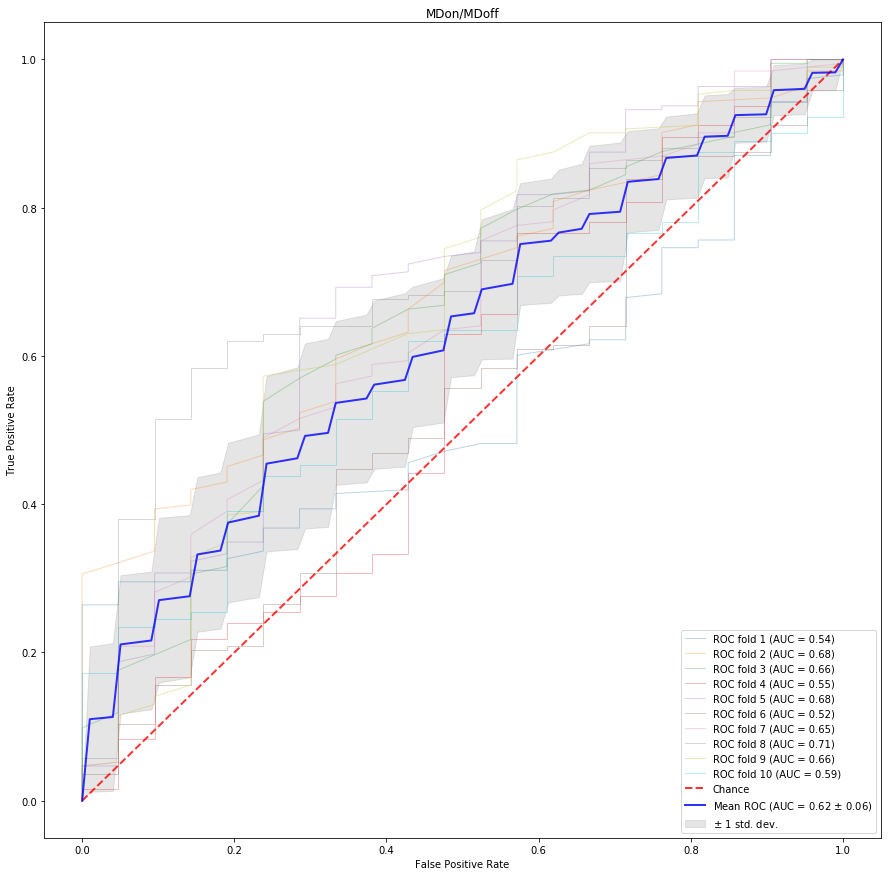

In [ ]:
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves


N = len(y)

cv_scores = []
predictions = {
    'pred': np.zeros(N, dtype=np.bool),
    'proba': np.zeros(N),
    'foldno': np.zeros(N, dtype=np.int32) - 1,
}








sen_list=[]
spe_list=[]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n=0
fig=plt.figure()
best_score_last=0
#plt.rcParams["figure.figsize"] = [15,15]
for i in range(10):
    n+=1
    X_train = X[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])].copy()
    X_vali = X[FoldIndicesList[i-1][1]].copy()
    X_test = X[FoldIndicesList[i][1]].copy()
    
    
    y_train = y.loc[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])]
    y_train = y_train.reset_index(drop=True)
    
    y_vali = y.loc[FoldIndicesList[i-1][1]]
    y_vali = y_vali.reset_index(drop=True)
    
    y_test = y.loc[FoldIndicesList[i][1]]
    y_test = y_test.reset_index(drop=True)
    X_train=fill(X_train)
    X_vali=fill(X_vali)
    X_test=fill(X_test)
   
    #best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier, paramGrid,X_train, y_train, X_vali,metric=recall_score,  scoreLabel='AUC')   

    X_train, y_train= downsample(X_train, y_train)

    X_vali, y_vali= downsample(X_vali, y_vali)
    
    


    model=RandomForestClassifier()
    best_params = None
    best_val_f1 = None
    for these_params in pg:
        model.set_params(**these_params)
        model.fit(X_train, y_train)
        
        
        
        
        
        
        
        this_val_f1 = spe(y_vali, model.predict(X_vali))
        if not best_params or this_val_f1 > best_val_f1:
            best_params = these_params
            best_val_f1 = this_val_f1
    if len(pg) > 1:
        model.set_params(**best_params)
        model.fit(X_train, y_train)

    
    
    
    
    
    
    
    
    
    
    
    probas_ = model.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.rcParams["figure.figsize"] = (15,15)
    print(classification_report(y_test,model.predict(X_test)))
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label ='ROC fold %d (AUC = %0.2f)' % (n, roc_auc))
    
    y_test_predict=model.predict(X_test)
    sen_list.append(recall_score(y_test,y_test_predict, average="weighted"))
    spe_list.append(spe(y_test,y_test_predict))      
    
    joblib.dump(model, 'model_MDon_MDoff_'+str(i)+'.pkl')
    
    this_score=spe(y_vali,model.predict(X_vali))

    #fig.canvas.draw()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MDon/MDoff')
plt.legend(loc="lower right")
plt.savefig("roc_MDon_MDoff_419.png",dpi=400)
np.save('sen_MDon_MDoff_list.npy', sen_list)                    
np.save('spe_MDon_MDoff_list.npy', spe_list)   

In [ ]:
sen_MDon_MDoff_list=np.load('sen_MDon_MDoff_list.npy')
spe_MDon_MDoff_list=np.load('spe_MDon_MDoff_list.npy')
sen_TD_NTD_list=np.load('sen_TD_NTD_list.npy')
spe_TD_NTD_list=np.load('spe_TD_NTD_list.npy')
sen_MD_CD_list=np.load('sen_MD_CD_list.npy')
spe_MD_CD_list=np.load('spe_MD_CD_list.npy')

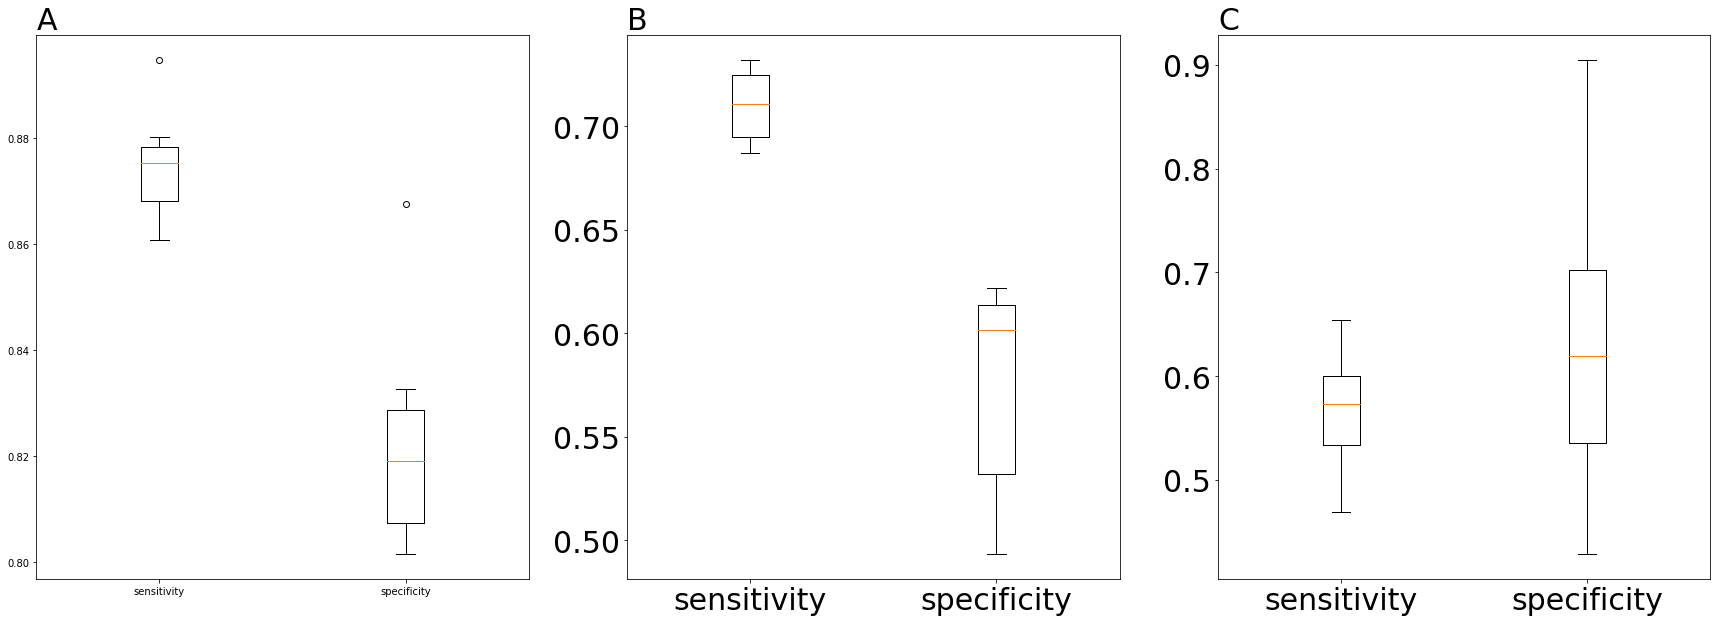

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 3, 1)
BIGGER_SIZE=30
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.boxplot(np.array([sen_TD_NTD_list,spe_TD_NTD_list]).T, labels=('sensitivity','specificity'))




ax.set_title('A',loc= 'left',size=30)
ax = fig.add_subplot(1, 3, 2)

plt.boxplot(np.array([sen_MD_CD_list,spe_MD_CD_list]).T, labels=('sensitivity','specificity'))

plt.rcParams.update({'font.size': BIGGER_SIZE})


ax.set_title('B',loc= 'left',size=30)
ax = fig.add_subplot(1, 3, 3)


plt.boxplot(np.array([sen_MDon_MDoff_list,spe_MDon_MDoff_list]).T, labels=('sensitivity','specificity'))

plt.rcParams.update({'font.size': BIGGER_SIZE})

ax.set_title('C',loc= 'left',size=30)
plt.savefig('sen_spe_ml.jpg', dpi =400)
plt.show()

In [ ]:
print(np.mean(sen_TD_NTD_list))

0.8746780745643615


In [ ]:
print(np.mean(spe_TD_NTD_list))

0.8217898832684825


In [ ]:
print(np.mean(sen_MD_CD_list))
print(np.mean(spe_MD_CD_list))

0.7099998469567346
0.576609831307818


In [ ]:
print(np.mean(sen_MDon_MDoff_list))
print(np.mean(spe_MDon_MDoff_list))

0.564413584309596
0.6333333333333334


In [ ]:
import seaborn as sns
import numpy.ma as ma
import joblib
from sklearn.metrics import recall_score

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
def downsample(x,y):
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(x, y)
        return X_res, y_res

Using TensorFlow backend.


In [ ]:
sen_MDon_MDoff_list=np.load('sen_MDon_MDoff_list.npy')
spe_MDon_MDoff_list=np.load('spe_MDon_MDoff_list.npy')
sen_TD_NTD_list=np.load('sen_TD_NTD_list.npy')
spe_TD_NTD_list=np.load('spe_TD_NTD_list.npy')
sen_MD_CD_list=np.load('sen_MD_CD_list.npy')
spe_MD_CD_list=np.load('spe_MD_CD_list.npy')

In [ ]:
from sklearn import preprocessing
def scale(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_minmax = min_max_scaler.fit_transform(x)    
    return x_minmax

In [ ]:
#paper plot

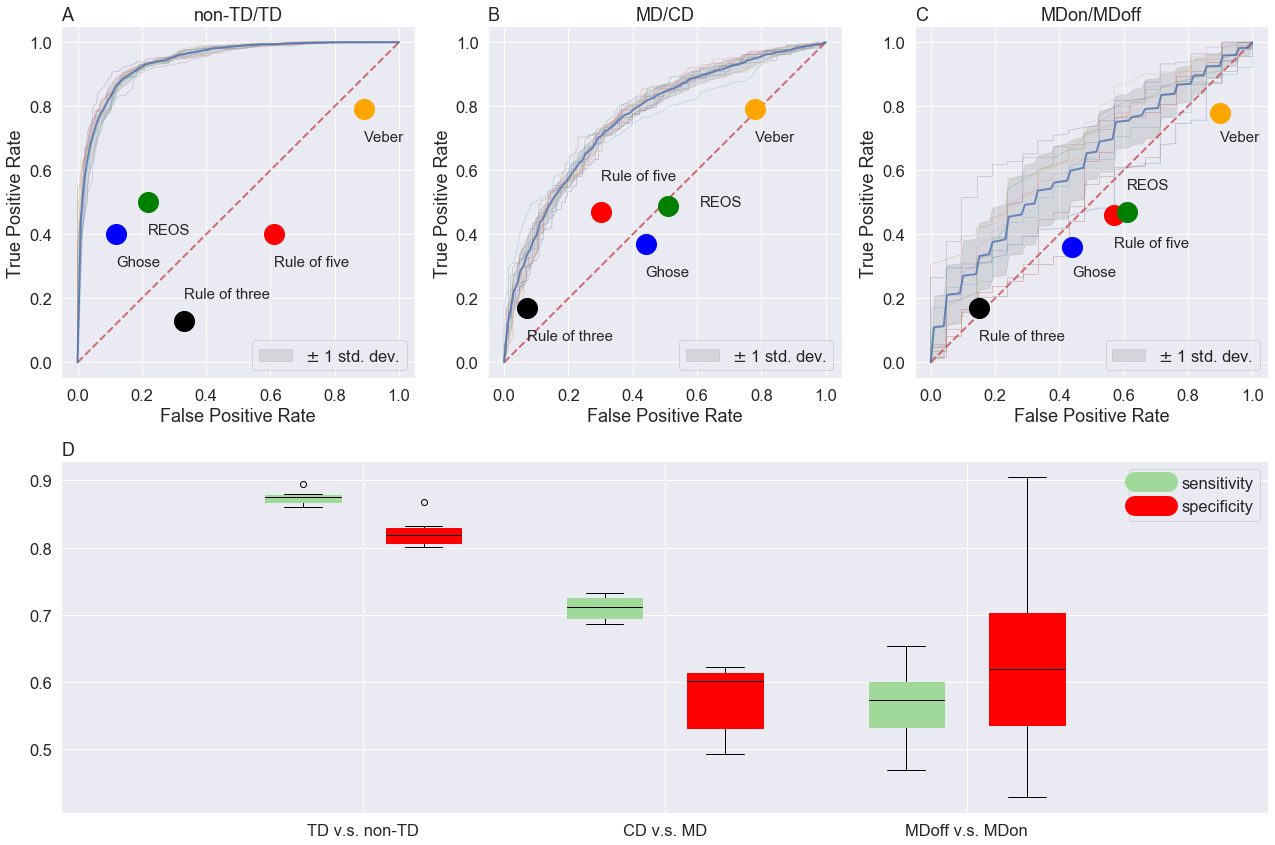

In [ ]:
#TD/NTD
sns.set(font_scale=1.5)
from matplotlib.gridspec import GridSpec 
y=Drugs['group']
y.shape
X=Drugs.drop(columns=['group','canonical_smiles'])
random_seed = 42
np.random.seed(random_seed)
X = np.array(X)
y = np.array(y_t_nt)

skf = StratifiedKFold(n_splits=10, random_state = random_seed, shuffle=True)
skf.get_n_splits(X, y)
 
FoldIndicesList = []
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    FoldIndicesList.append((train_index,test_index))
FoldIndicesList = np.asarray(FoldIndicesList)
y=pd.DataFrame(y)
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves


N = len(y)

cv_scores = []
predictions = {
    'pred': np.zeros(N, dtype=np.bool),
    'proba': np.zeros(N),
    'foldno': np.zeros(N, dtype=np.int32) - 1,
}







sen_list=[]
spe_list=[]


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n=0
fig=plt.figure(figsize=(18,12))
BIGGER_SIZE=15
plt.rcParams.update({'font.size': BIGGER_SIZE})
ax1 = plt.subplot2grid((2,3),(0,0)) 

#ax1.rcParams["figure.figsize"] = (20,20)
#plt.rcParams["figure.figsize"] = [15,15]
best_score_last=0

ax1.set_title('A',loc= 'left')

for i in range(10):
    n+=1
    n+=1
    X_train = X[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])].copy()
    X_vali = X[FoldIndicesList[i-1][1]].copy()
    X_test = X[FoldIndicesList[i][1]].copy()
    
    
    y_train = y.loc[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])]
    y_train = y_train.reset_index(drop=True)
    
    y_vali = y.loc[FoldIndicesList[i-1][1]]
    y_vali = y_vali.reset_index(drop=True)
    
    y_test = y.loc[FoldIndicesList[i][1]]
    y_test = y_test.reset_index(drop=True)
    X_train=fill(X_train)
    X_vali=fill(X_vali)
    X_test=fill(X_test)

    
    
    
    
    
    
    
    
    
    model = joblib.load('model_TD_NTD_'+str(i)+'.pkl')
    
    probas_ = model.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    ax1.plot(fpr, tpr, lw=1, alpha=0.3)
    
    y_test_predict=model.predict(X_test)
    sen_list.append(recall_score(y_test,y_test_predict, average="weighted"))
    spe_list.append(spe(y_test,y_test_predict))
    
    
    

    


    #fig.canvas.draw()
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax1.plot(mean_fpr, mean_tpr, color='b',
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
ax1.plot([0.61], [0.4], marker='o', markersize=20, color="red")
ax1.text(0.61, 0.3, 'Rule of five')
ax1.text(0.12, 0.3, 'Ghose')
ax1.text(0.89, 0.69, 'Veber')
ax1.text(0.33, 0.20, 'Rule of three')
ax1.text(0.22, 0.4, 'REOS')
ax1.plot([0.12], [0.4], marker='o', markersize=20, color="blue")

ax1.plot([0.89], [0.79], marker='o', markersize=20, color="orange")

ax1.plot([0.33], [0.13], marker='o', markersize=20, color="black")

ax1.plot([0.22], [0.5], marker='o', markersize=20, color="green")

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')

plt.rcParams["figure.figsize"] = [50,30]
plt.ylabel('True Positive Rate')
plt.title('non-TD/TD')
plt.legend(loc="lower right")




#CD/MD
y=Drugs['group']
X=Drugs.drop(columns=['group','canonical_smiles'])
y_m_c=[]
X_m_c=[]

for i in range(len(y)):
    
    if y[i] ==3:
        continue
    elif y[i] ==0 or y[i] == 1:
        
        y_m_c.append(1)
        X_m_c.append(X.iloc[i,:].values)
    else:
        
        y_m_c.append(0)
        X_m_c.append(X.iloc[i,:].values)
X_m_c=np.array(X_m_c)

random_seed = 42
np.random.seed(random_seed)
X = np.array(X_m_c)
y = np.array(y_m_c)

skf = StratifiedKFold(n_splits=10, random_state = random_seed, shuffle=True)
skf.get_n_splits(X, y)

FoldIndicesList = []
for train_index, test_index in skf.split(X, y):
    
    FoldIndicesList.append((train_index,test_index))
FoldIndicesList = np.asarray(FoldIndicesList)
np.save('FoldIndicesList',FoldIndicesList)
y=pd.DataFrame(y)
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves


N = len(y)

cv_scores = []
predictions = {
    'pred': np.zeros(N, dtype=np.bool),
    'proba': np.zeros(N),
    'foldno': np.zeros(N, dtype=np.int32) - 1,
}







sen_list=[]
spe_list=[]


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n=0

#plt.rcParams["figure.figsize"] = [15,15]
best_score_last=0
ax2 = plt.subplot2grid((2,3),(0,1)) 
ax2.set_title('B',loc= 'left')
for i in range(10):
    n+=1
    X_train = X[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])].copy()
    X_vali = X[FoldIndicesList[i-1][1]].copy()
    X_test = X[FoldIndicesList[i][1]].copy()
    
    
    y_train = y.loc[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])]
    y_train = y_train.reset_index(drop=True)
    
    y_vali = y.loc[FoldIndicesList[i-1][1]]
    y_vali = y_vali.reset_index(drop=True)
    
    y_test = y.loc[FoldIndicesList[i][1]]
    y_test = y_test.reset_index(drop=True)
    X_train=fill(X_train)
    X_vali=fill(X_vali)
    X_test=fill(X_test)

    #best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier, paramGrid,X_train, y_train, X_vali,metric=recall_score,  scoreLabel='AUC')   

    
    
    


    model=joblib.load('model_CD_MD_'+str(i)+'.pkl')

    
    
    
    
    
    
    
    
    
    
    
    probas_ = model.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    ax2.plot(fpr, tpr, lw=1, alpha=0.3)
    y_test_predict=model.predict(X_test)
    sen_list.append(recall_score(y_test,y_test_predict, average="weighted"))
    spe_list.append(spe(y_test,y_test_predict))    
    
    
    

        
    #fig.canvas.draw()
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax2.plot(mean_fpr, mean_tpr, color='b',
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax2.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
ax2.plot([0.30], [0.47], marker='o', markersize=20, color="red")
ax2.plot([0.44], [0.37], marker='o', markersize=20, color="blue")
ax2.plot([0.78], [0.79], marker='o', markersize=20, color="orange")
ax2.plot([0.07], [0.17], marker='o', markersize=20, color="black")
ax2.plot([0.51], [0.49], marker='o', markersize=20, color="green")
ax2.text(0.30, 0.57, 'Rule of five')
ax2.text(0.44, 0.27, 'Ghose')
ax2.text(0.78, 0.69, 'Veber')
ax2.text(0.07, 0.07, 'Rule of three')
ax2.text(0.61, 0.49, 'REOS')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.rcParams["figure.figsize"] = [50,30]
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MD/CD')
plt.legend(loc="lower right")
                        

#MDon/MDoff

y=Drugs['group']
X=Drugs.drop(columns=['group','canonical_smiles'])

y_wd_md=[]
X_wd_md=[]

for i in range(len(y)):
    if y[i] ==3 or y[i]==2 or y[i] ==4:
        continue
    elif y[i] ==0:

        y_wd_md.append(1)
        X_wd_md.append(X.iloc[i,:].values)
    elif y[i] == 1:

        y_wd_md.append(0)
        X_wd_md.append(X.iloc[i,:].values)

X_wd_md=np.array(X_wd_md)
random_seed = 42
np.random.seed(random_seed)
X = np.array(X_wd_md)
y = np.array(y_wd_md)

skf = StratifiedKFold(n_splits=10, random_state = random_seed, shuffle=True)
skf.get_n_splits(X, y)

FoldIndicesList = []
for train_index, test_index in skf.split(X, y):
    
    FoldIndicesList.append((train_index,test_index))
FoldIndicesList = np.asarray(FoldIndicesList)
np.save('FoldIndicesList',FoldIndicesList)
y=pd.DataFrame(y)
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves


N = len(y)

cv_scores = []
predictions = {
    'pred': np.zeros(N, dtype=np.bool),
    'proba': np.zeros(N),
    'foldno': np.zeros(N, dtype=np.int32) - 1,
}








sen_list=[]
spe_list=[]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n=0
ax3 = plt.subplot2grid((2,3),(0,2)) 
ax3.set_title('C',loc= 'left')
best_score_last=0
#plt.rcParams["figure.figsize"] = [15,15]
for i in range(10):
    n+=1
    X_train = X[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])].copy()
    X_vali = X[FoldIndicesList[i-1][1]].copy()
    X_test = X[FoldIndicesList[i][1]].copy()
    
    
    y_train = y.loc[np.setdiff1d(FoldIndicesList[i][0],FoldIndicesList[i-1][1])]
    y_train = y_train.reset_index(drop=True)
    
    y_vali = y.loc[FoldIndicesList[i-1][1]]
    y_vali = y_vali.reset_index(drop=True)
    
    y_test = y.loc[FoldIndicesList[i][1]]
    y_test = y_test.reset_index(drop=True)
    X_train=fill(X_train)
    X_vali=fill(X_vali)
    X_test=fill(X_test)
  
    #best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier, paramGrid,X_train, y_train, X_vali,metric=recall_score,  scoreLabel='AUC')   

    X_train, y_train= downsample(X_train, y_train)

    X_vali, y_vali= downsample(X_vali, y_vali)
    
    


    model=joblib.load('model_MDon_MDoff_'+str(i)+'.pkl')
    
    
    
    
    
    
    
    
    
    probas_ = model.predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    ax3.plot(fpr, tpr, lw=1, alpha=0.3)
    
    y_test_predict=model.predict(X_test)
    sen_list.append(recall_score(y_test,y_test_predict, average="weighted"))
    spe_list.append(spe(y_test,y_test_predict))      
    
    
    

        
    #fig.canvas.draw()
ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax3.plot(mean_fpr, mean_tpr, color='b',
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
ax3.plot([0.57], [0.46], marker='o', markersize=20, color="red")
ax3.plot([0.44], [0.36], marker='o', markersize=20, color="blue")
ax3.plot([0.90], [0.78], marker='o', markersize=20, color="orange")
ax3.plot([0.15], [0.17], marker='o', markersize=20, color="black")
ax3.plot([0.61], [0.47], marker='o', markersize=20, color="green")
ax3.text(0.57, 0.36, 'Rule of five')
ax3.text(0.44, 0.27, 'Ghose')
ax3.text(0.90, 0.69, 'Veber')
ax3.text(0.15, 0.07, 'Rule of three')
ax3.text(0.61, 0.54, 'REOS')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.rcParams["figure.figsize"] = [50,30]
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MDon/MDoff')
plt.legend(loc="lower right")


#sen_spe
ax4 = plt.subplot2grid((2,3),(1,0), colspan=3) 
ax4.set_title('D',loc= 'left')
ticks = ['TD v.s. non-TD', 'CD v.s. MD', 'MDoff v.s. MDon']
data_a = [sen_TD_NTD_list, sen_MD_CD_list, sen_MDon_MDoff_list]
data_b = [spe_TD_NTD_list, spe_MD_CD_list, spe_MDon_MDoff_list]
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)



bpl = ax4.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4,patch_artist=True)
bpr = ax4.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4,patch_artist=True)
#colors = ['pink', 'green']
 
   
set_box_color(bpl, '#a1d99b') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'red')
plt.setp(bpl['medians'], color='black')
plt.setp(bpr['medians'], color='black')
# draw temporary red and blue lines and use them to create a legend
ax4.plot([], c='#a1d99b', label='sensitivity', linewidth=20)
ax4.plot([], c='red', label='specificity', linewidth=20)
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)

plt.tight_layout()

plt.savefig("paper_plot_ml_727_last.jpg",dpi=500)
plt.savefig("paper_plot_ml_727_last.tiff",dpi=500)


















In [ ]:
#plot feature map

In [ ]:
import joblib

In [ ]:
model_MDon_MDoff_best=joblib.load('model_MDon_MDoff.pkl')
model_CD_MD_best=joblib.load('model_CD_MD.pkl')
model_TD_NTD_best=joblib.load('model_TD_NTD.pkl')


In [ ]:
MACCS=['1 ISOTOPE', 
'2 103 < ATOMIC NO. < 256',
'3 GROUP IVA,VA,VIA PERIODS 4-6 (Ge...)' ,
'4 ACTINIDE', 
'5 GROUP IIIB,IVB (Sc...)',
'6 LANTHANIDE' ,
'7 GROUP VB,VIB,VIIB (V...)' ,
'8 QAAA@1' ,
'9 GROUP VIII (Fe...)', 
'10 GROUP IIA (ALKALINE EARTH)', 
'11 4M RING' ,
'12 GROUP IB,IIB (Cu...)' ,
'13 ON(C)C' ,
'14 S-S' ,
'15 OC(O)O' ,
'16 QAA@1', 
'17 CTC' ,
'18 GROUP IIIA (B...)' ,
'19 7M RING' ,
'20 SI' ,
'21 C=C(Q)Q' ,
'22 3M RING' ,
'23 NC(O)O', 
'24 N-O' ,
'25 NC(N)N' ,
'26 C$=C($A)$A' ,
'27 I' ,
'28 QCH2Q', 
'29 P' ,
'30 CQ(C)(C)A', 
'31 QX' ,
'32 CSN' ,
'33 NS' ,
'34 CH2=A' ,
'35 GROUP IA (ALKALI METAL)' ,
'36 S HETEROCYCLE', 
'37 NC(O)N' ,
'38 NC(C)N' ,
'39 OS(O)O' ,
'40 S-O',
'41 CTN ',
'42 F' ,
'43 QHAQH' ,
'44 OTHER ',
'45 C=CN ',
'46 BR ',
'47 SAN ',
'48 OQ(O)O ',
'49 CHARGE ',
'50 C=C(C)C ',
'51 CSO ',
'52 NN ',
'53 QHAAAQH ',
'54 QHAAQH ',
'55 OSO ',
'56 ON(O)C' ,
'57 O HETEROCYCLE ',
'58 QSQ ',
'59 Snot%A%A' ,
'60 S=O ',
'61 AS(A)A ',
'62 A$A!A$A ',
'63 N=O ',
'64 A$A!S' ,
'65 C%N ',
'66 CC(C)(C)A ',
'67 QS' ,
'68 QHQH (&...) ',
'69 QQH ',
'70 QNQ' ,
'71 NO ',
'72 OAAO ',
'73 S=A ',
'74 CH3ACH3 ',
'75 A!N$A' ,
'76 C=C(A)A ',
'77 NAN ',
'78 C=N ',
'79 NAAN ',
'80 NAAAN ',
'81 SA(A)A ',
'82 ACH2QH ',
'83 QAAAA@1 ',
'84 NH2 ',
'85 CN(C)C ',
'86 CH2QCH2 ',
'87 X!A$A ',
'88 S ',
'89 OAAAO' ,
'90 QHAACH2A ',
'91 QHAAACH2A ',
'92 OC(N)C ',
'93 QCH3 ',
'94 QN ',
'95 NAAO' ,
'96 5M RING' ,
'97 NAAAO ',
'98 QAAAAA@1 ',
'99 C=C ',
'100 ACH2N' ,
'101 8M RING ',
'102 QO ',
'103 CL' ,
'104 QHACH2A' ,
'105 A$A($A)$A ',
'106 QA(Q)Q ',
'107 XA(A)A ',
'108 CH3AAACH2A ',
'109 ACH2O ',
'110 NCO' ,
'111 NACH2A ',
'112 AA(A)(A)A ',
'113 Onot%A%A ',
'114 CH3CH2A ',
'115 CH3ACH2A ',
'116 CH3AACH2A' ,
'117 NAO ',
'118 ACH2CH2A > 1' ,
'119 N=A ',
'120 HETEROCYCLIC ATOM > 1 (&...) ',
'121 N HETEROCYCLE ',
'122 AN(A)A ',
'123 OCO ',
'124 QQ ',
'125 AROMATIC RING > 1 ',
'126 A!O!A ',
'127 A$A!O > 1 (&...) ',
'128 ACH2AAACH2A ',
'129 ACH2AACH2A ',
'130 QQ > 1 (&...) ',
'131 QH > 1 ',
'132 OACH2A ',
'133 A$A!N ',
'134 X (HALOGEN)' ,
'135 Nnot%A%A ',
'136 O=A > 1 ',
'137 HETEROCYCLE' ,
'138 QCH2A > 1 (&...) ',
'139 OH ',
'140 O > 3 (&...) ',
'141 CH3 > 2 (&...) ',
'142 N > 1 ',
'143 A$A!O ',
'144 Anot%A%Anot%A ',
'145 6M RING > 1 ',
'146 O > 2 ',
'147 ACH2CH2A ',
'148 AQ(A)A ',
'149 CH3 > 1 ',
'150 A!A$A!A ',
'151 NH ',
'152 OC(C)C ',
'153 QCH2A ',
'154 C=O ',
'155 A!CH2!A ',
'156 NA(A)A ',
'157 C-O ',
'158 C-N ',
'159 O > 1' ,
'160 CH3' ,
'161 N ',
'162 AROMATIC', 
'163 6M RING' ,
'164 O ',
'165 RING ',
'166 FRAGMENTS']

In [ ]:
from copy import deepcopy

In [ ]:
heatmap_name=deepcopy(list(Drugs))

In [ ]:
heatmap_name

['atom_stereo_count',
 'bond_stereo_count',
 'canonical_smiles',
 'charge',
 'complexity',
 'covalent_unit_count',
 'defined_atom_stereo_count',
 'defined_bond_stereo_count',
 'h_bond_acceptor_count',
 'h_bond_donor_count',
 'heavy_atom_count',
 'isotope_atom_count',
 'molecular_weight',
 'monoisotopic_mass',
 'rotatable_bond_count',
 'tpsa',
 'undefined_atom_stereo_count',
 'undefined_bond_stereo_count',
 'xlogp',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '8

In [ ]:
heatmap_name[19:]=MACCS

In [ ]:
heatmap_name[19:]=MACCS
heatmap_name.remove('canonical_smiles')
heatmap_name=np.array(heatmap_name)
heatmap_name=np.char.replace(heatmap_name,'tpsa', 'PSA')
heatmap_name=np.char.replace(heatmap_name,'h_bond_acceptor_count', 'H bond acceptor count')
heatmap_name=np.char.replace(heatmap_name,'h_bond_donor_count', 'H bond donor count')
heatmap_name=np.char.replace(heatmap_name,'xlogp', 'logP')
heatmap_name[:18]=np.char.replace(heatmap_name[:18],'_', ' ')
heatmap_name

array(['atom stereo count', 'bond stereo count', 'charge', 'complexity',
       'covalent unit count', 'defined atom stereo count',
       'defined bond stereo count', 'H bond acceptor count',
       'H bond donor count', 'heavy atom count', 'isotope atom count',
       'molecular weight', 'monoisotopic mass', 'rotatable bond count',
       'PSA', 'undefined atom stereo count',
       'undefined bond stereo count', 'logP', '1 ISOTOPE',
       '2 103 < ATOMIC NO. < 256',
       '3 GROUP IVA,VA,VIA PERIODS 4-6 (Ge...)', '4 ACTINIDE',
       '5 GROUP IIIB,IVB (Sc...)', '6 LANTHANIDE',
       '7 GROUP VB,VIB,VIIB (V...)', '8 QAAA@1', '9 GROUP VIII (Fe...)',
       '10 GROUP IIA (ALKALINE EARTH)', '11 4M RING',
       '12 GROUP IB,IIB (Cu...)', '13 ON(C)C', '14 S-S', '15 OC(O)O',
       '16 QAA@1', '17 CTC', '18 GROUP IIIA (B...)', '19 7M RING',
       '20 SI', '21 C=C(Q)Q', '22 3M RING', '23 NC(O)O', '24 N-O',
       '25 NC(N)N', '26 C$=C($A)$A', '27 I', '28 QCH2Q', '29 P',
       '30 CQ(C

In [ ]:
len(heatmap_name)

184

In [ ]:
feature_imp = pd.DataFrame(model_TD_NTD_best.feature_importances_,index=heatmap_name,columns=['TD/non-TD'])
feature_imp['CD/MD']=model_CD_MD_best.feature_importances_

In [ ]:
feature_imp['MDon/MDoff']=model_MDon_MDoff_best.feature_importances_

In [ ]:
feature_imp

,TD/non-TD,CD/MD,MDon/MDoff
atom stereo count,0.017619,0.019739,0.015071
bond stereo count,0.003679,0.003805,0.000000
charge,0.002980,0.003404,0.000000
complexity,0.094166,0.081492,0.022213
covalent unit count,0.003297,0.004242,0.000000
...,...,...,...
162 AROMATIC,0.002843,0.002858,0.003100
163 6M RING,0.001467,0.002146,0.000000
164 O,0.001167,0.001519,0.000000
165 RING,0.001285,0.001380,0.000000


In [ ]:
feature_imp

,TD/non-TD,CD/MD,MDon/MDoff
atom stereo count,0.017619,0.019739,0.015071
bond stereo count,0.003679,0.003805,0.000000
charge,0.002980,0.003404,0.000000
complexity,0.094166,0.081492,0.022213
covalent unit count,0.003297,0.004242,0.000000
...,...,...,...
162 AROMATIC,0.002843,0.002858,0.003100
163 6M RING,0.001467,0.002146,0.000000
164 O,0.001167,0.001519,0.000000
165 RING,0.001285,0.001380,0.000000


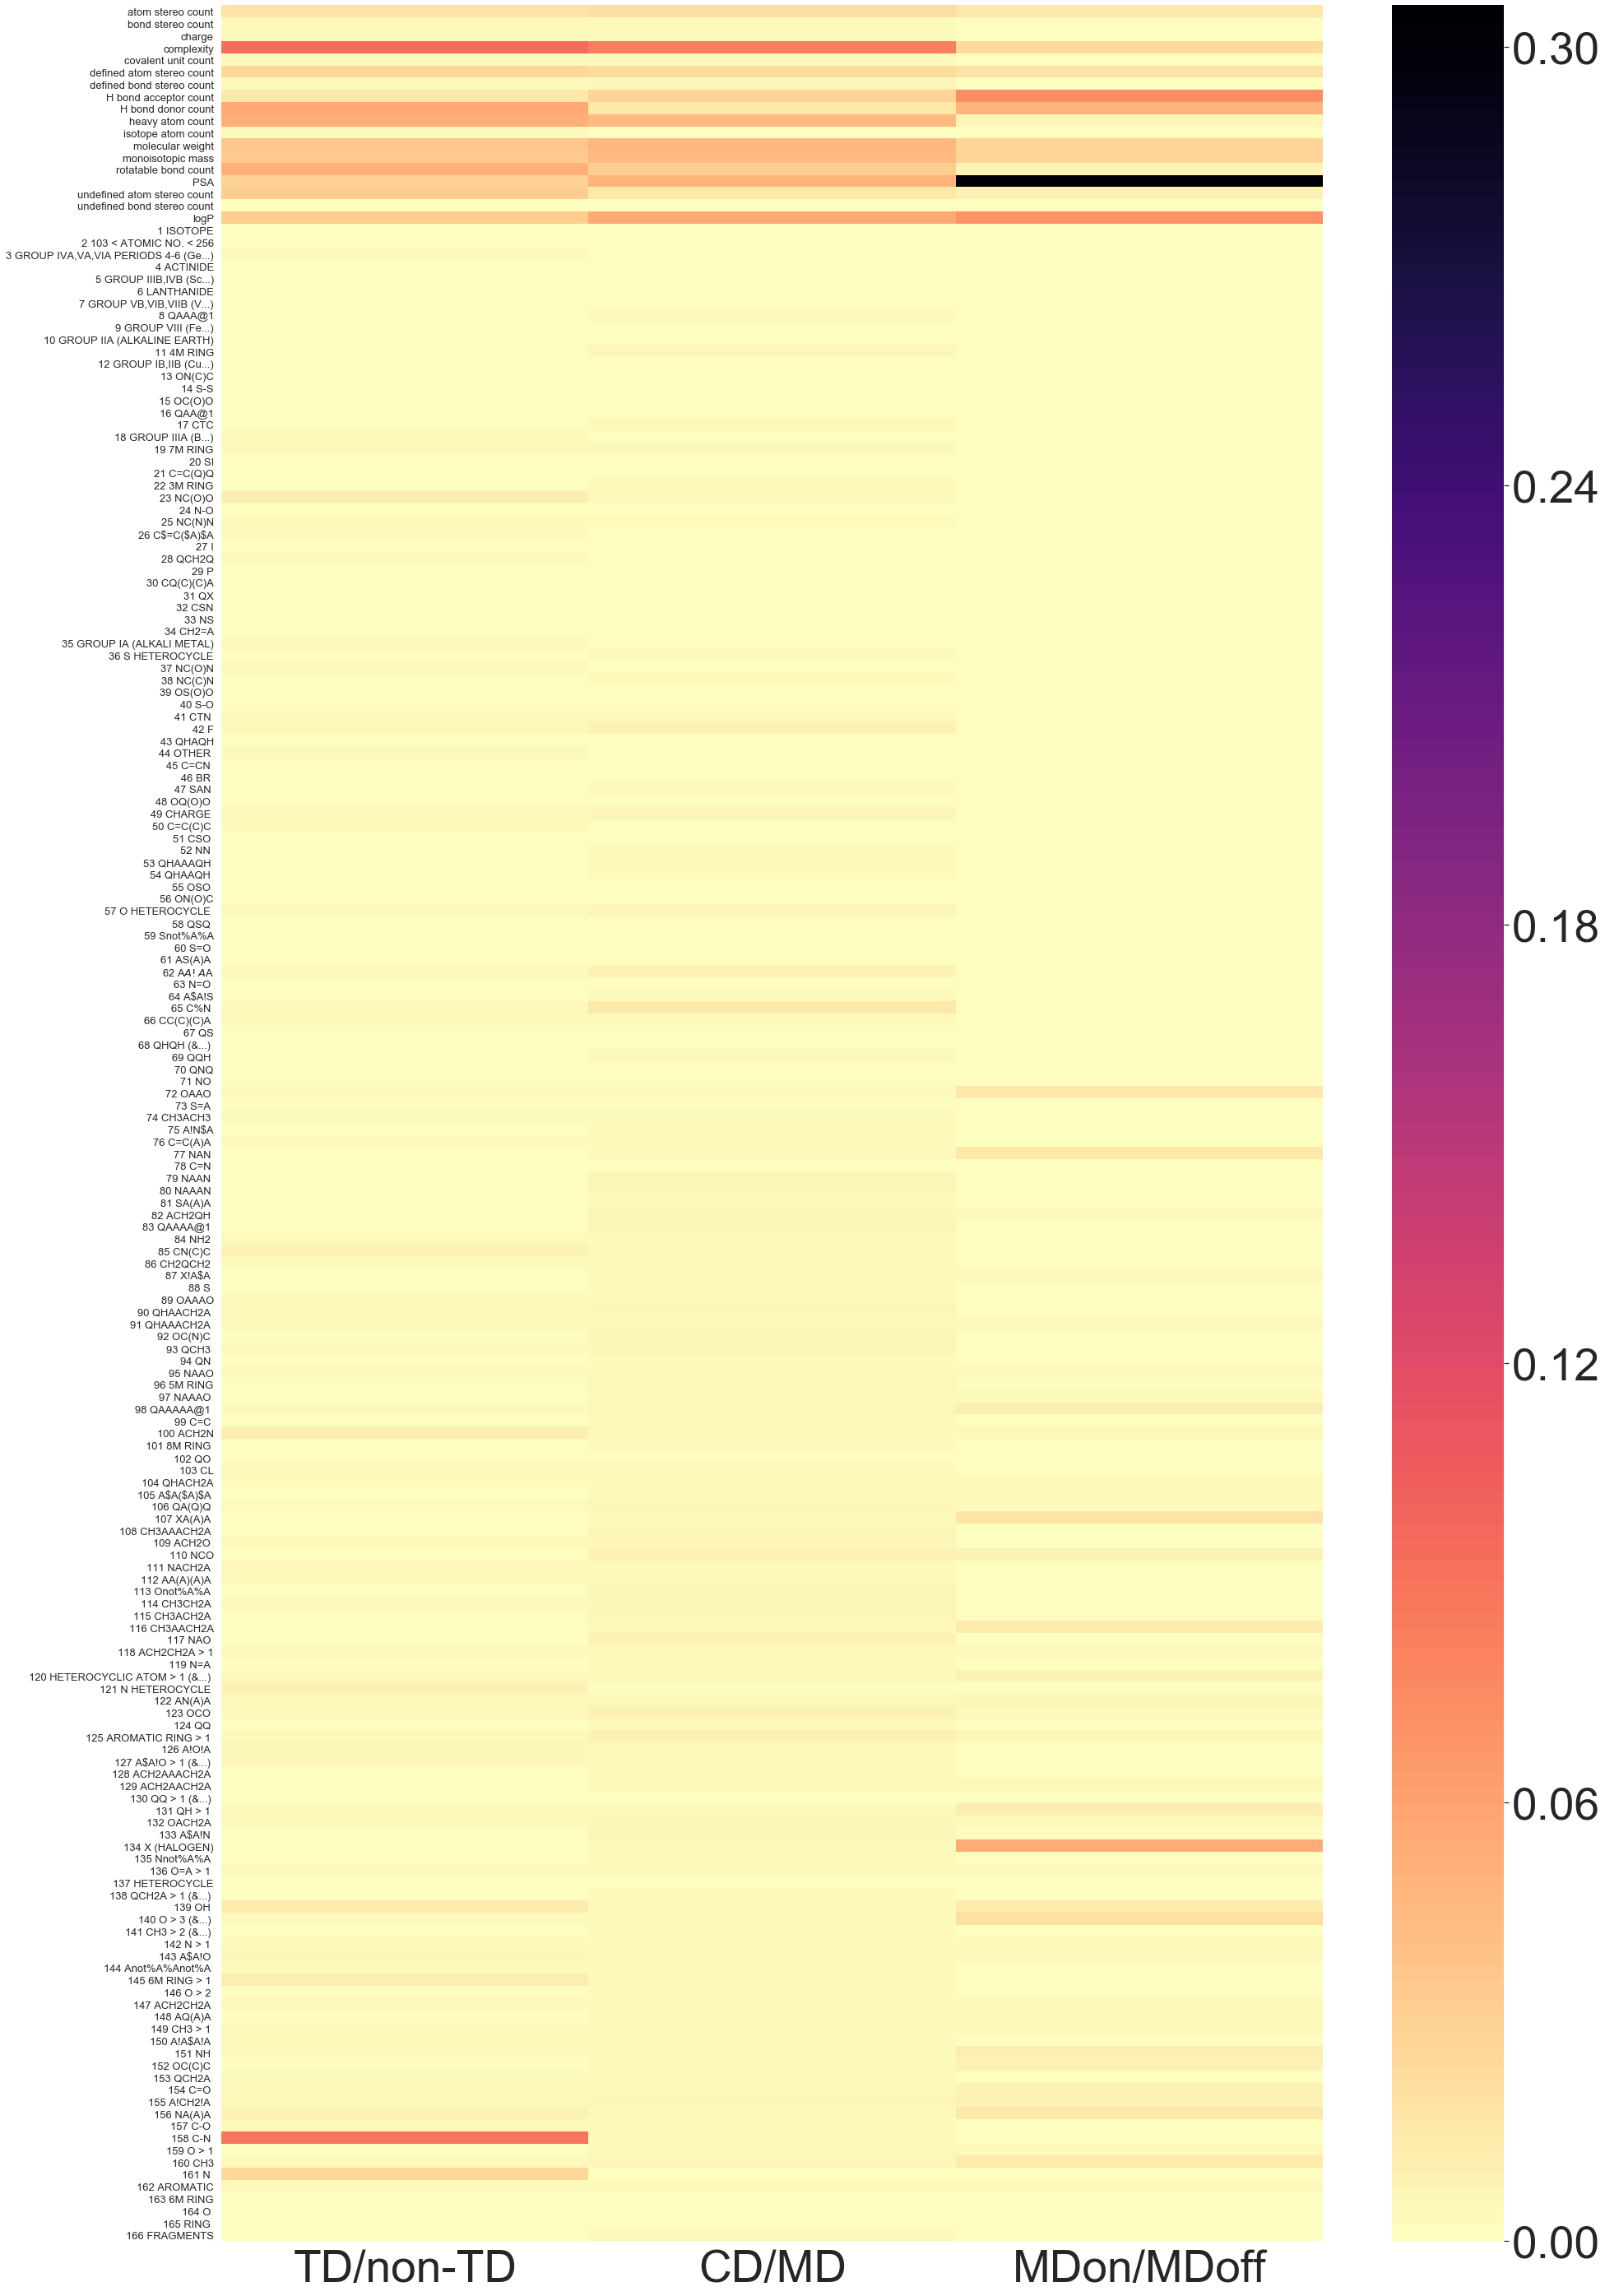

In [ ]:
import seaborn as sns
fig = plt.gcf()
fig.set_size_inches(30,50)
sns.set(font_scale=5)
plt.yticks(fontsize=13)
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()
viridis = cm.get_cmap('viridis', 12)
top = cm.get_cmap('magma', 128)

newcolors =top(np.flipud(np.linspace(0, 1, 128)))

newcmp = ListedColormap(newcolors, name='OrangeBlue')
sns.heatmap(feature_imp,cmap=newcmp)



In [ ]:
fig.savefig('heatmap_feature_ml_all_630.tiff',dpi=500, bbox_inches='tight',pad_inches = 0)
fig.savefig('heatmap_feature_ml_all_630.png',dpi=500, bbox_inches='tight',pad_inches = 0)